# Calculating integrals

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from integrals import *
from rootfinding import *

# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 150

## First investigate simple trapezoidal and Simpson's (quadratic) summations for quadrature

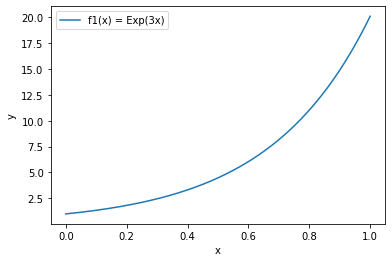

In [2]:
a = 0
b = 1
xvals = np.linspace(a,b,10000)
f1 = np.exp(3*xvals)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(xvals,f1,label="f1(x) = Exp(3x)")
plt.legend()
plt.show()

Our function is given as : $f(x) = e^{3x}$.  
Analytical result of the integration : $\int_0^1 dx e^{3x} = \frac{1}{3} (e^3 - 1) \sim 6.36185$

In [3]:
n1 = 100000 # Number of divisions for trapezoidal rule
ans1 = trapezoid(lambda x:np.exp(3*x), a, b, n1)
print ('Trapezoidal rule = ' + str(ans1))

ans2 = simpson(lambda x:np.exp(3*x), a, b, n1)
print ('Simpsons rule = ' + str(ans2))

Trapezoidal rule = 6.361845641539697
Simpsons rule = 6.361845641062558


## Next investigate the adaptive trapezoidal quadrature

In [4]:

ans3 = adaptive_trapezoid(lambda x:np.exp(3*x), a, b, 0.00001, output=True)
print ('Adaptive trapezoidal rule = ' + str(ans3))



N = 2,  Integral = 10.542768461593834
N = 2.0,  Integral = 7.512228765965949
N = 4.0,  Integral = 6.657298346225774
N = 8.0,  Integral = 6.436224369354567
N = 16.0,  Integral = 6.380472949015574
N = 32.0,  Integral = 6.366504513566256
N = 64.0,  Integral = 6.3630104871335105
N = 128.0,  Integral = 6.3621368605784285
N = 256.0,  Integral = 6.361918446441433
N = 512.0,  Integral = 6.361863842438524
N = 1024.0,  Integral = 6.3618501914085
Adaptive trapezoidal rule = 6.3618501914085


We find that the all three methods of computing integrals give a fairly acurate value of the integral. It takes absolutely no time to integrate in the first two methods. And in the adpative trapezoid method integral converges in 512 steps. 

# Root Finding

## Root finding of the first function $f(x) = tan(x)$  
Function has only one root at $x=0$ if $x \in (-\frac{\pi}{2},\frac{\pi}{2})$

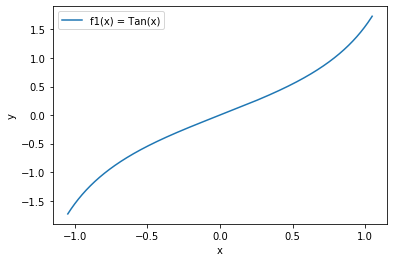

In [5]:
#### Function 1 : 
#### f(x) = tan(x)
a = -np.pi/3
b = np.pi/3
xvals = np.linspace(a,b,10000)
yvals = np.tan(xvals)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(xvals,yvals,label="f1(x) = Tan(x)")
plt.legend()
plt.show()


## Algorithms : Simple Search and Bisection

In [6]:
print(" 1. Simple search")
xmid = (a+b)*0.5
dx = 0.01
acc = 1e-5
label1='simple'
f = np.tan
answer1,iterations1 = root_simple(f, xmid, dx, acc,1000,True)

print(" 2. Bisection search")
acc = 1e-5
label2='bisection'
answer2,iterations2 = root_bisection(f, a, b, acc,1000,True)


 1. Simple search

 ROOT FINDING using Simple Search with Step Halving
 Requested accuracy = 1e-05
 Step     Guess For Root          Step Size           Function Value
 ----  --------------------  --------------------  --------------------
    0  0.0                   0.01                  0.0                 
 2. Bisection search

 ROOT FINDING using Bisection Search
 Requested accuracy = 1e-05
 Step     Guess For Root          Step Size           Function Value
 ----  --------------------  --------------------  --------------------
    0  0.0                   2.0943951023931953    0.0                 
    1  0.0                   0.0                   0.0                 


We compute the number of iterations it take for the function to reach the roots. However we find that if the interval is symmetric both methods yeild correct roots in almost one interations. So I made the interval asymmetric along Y-axis. Following cell demonstrates out results. 

In [7]:
a = -np.pi/4
b = np.pi/3
print(" 1. Simple search")
xmid = (a+b)*0.5
dx = 0.01
acc = 1e-5
label1='simple'
f = np.tan
answer1,iterations1 = root_simple(f, xmid, dx, acc,1000,True)

print(" 2. Bisection search")
acc = 1e-5
label2='bisection'
answer2,iterations2 = root_bisection(f, a, b, acc,1000,True)


 1. Simple search

 ROOT FINDING using Simple Search with Step Halving
 Requested accuracy = 1e-05
 Step     Guess For Root          Step Size           Function Value
 ----  --------------------  --------------------  --------------------
    0  0.13089969389957468   0.01                  0.1316524975873958  
    1  0.14089969389957469   0.01                  0.141839572498585   
    2  0.1508996938995747    0.01                  0.15205558803072933 
    3  0.1608996938995747    0.01                  0.16230271995929477 
    4  0.1708996938995747    0.01                  0.1725831698220546  
    5  0.18089969389957472   0.01                  0.18289916687067892 
    6  0.19089969389957473   0.01                  0.19325297007196762 
    7  0.20089969389957474   0.01                  0.20364687016266173 
    8  0.21089969389957475   0.01                  0.21408319176193508 
    9  0.22089969389957476   0.01                  0.22456429554585264 
   10  0.23089969389957476   0.01       

In [ ]:
  
# print(" 2. Newton-Ralphson method")
# acc = 1e-7
# label2='Newton-Ralphson'
# root_tangent(f, fp, x0, accuracy=1.0e-6, max_steps=20, root_debug=False)

I find that the Bisection Method gives a more accute value of the root. 

## Root finding for the second function : $f(x) = tanh(x)$  
Function has only one root $x=0$.

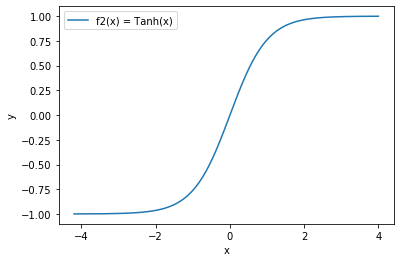

In [8]:
#### Function 2 : 
#### f(x) = tanh(x)
a = -4.2
b = 4
xvals = np.linspace(a,b,10000)
yvals = np.tanh(xvals)

plt.xlabel("x")
plt.ylabel("y")
plt.plot(xvals,yvals,label="f2(x) = Tanh(x)")
plt.legend()
plt.show()


In [9]:
print(" 1. Simple search")
xmid = (a+b)*0.5
dx = 0.01
acc = 1e-7
label1='simple'
f = np.tanh
answer1,iterations1 = root_simple(f, xmid, dx, acc,100000,True)

print(" 2. Bisection search")
acc = 1e-7
label2='bisection'
answer2,iterations2 = root_bisection(f, a, b, acc,100000,True)


 1. Simple search

 ROOT FINDING using Simple Search with Step Halving
 Requested accuracy = 1e-07
 Step     Guess For Root          Step Size           Function Value
 ----  --------------------  --------------------  --------------------
    0  -0.10000000000000009  0.01                  -0.0996679946249559 
    1  -0.0900000000000001   0.01                  -0.0897577847471602 
    2  -0.0800000000000001   0.01                  -0.07982976911113146
    3  -0.0700000000000001   0.01                  -0.0698858903164291 
    4  -0.0600000000000001   0.01                  -0.0599281035291436 
    5  -0.0500000000000001   0.01                  -0.049958374957880074
    6  -0.0400000000000001   0.01                  -0.03997868031116367
    7  -0.030000000000000096  0.01                  -0.02999100323882024
    8  -0.020000000000000094  0.01                  -0.019997333759931023
    9  -0.010000000000000094  0.01                  -0.009999666679999554
   10  -9.367506770274758e-17  0.0

Both bisection method gives a fairly accurate value of the root. Note that the interval to compute the root is slightly asymmetric. If we make if symmetric we get the exact value of the root both algorithms. 


In [10]:
# fp = 1 - 
# print(" 2. Newton-Ralphson method")
# acc = 1e-7
# label2='Newton-Ralphson'
# root_tangent(f, fp, x0, accuracy=1.0e-6, max_steps=20, root_debug=False)